### Run the Database Connection File

In [1]:
%run ./db_connections.ipynb

### Running the ETL and Visualisations for all four datasets

The connection has been established successfully
Loading data from FDA API...
Loading data from FDA API...
Data loaded successfully from FDA API.
Data loaded from MongoDB collection into a DataFrame.
Null Value Count before pre-processing:
_id                               0
country                           0
city                              0
address_1                         2
reason_for_recall                 0
address_2                     22392
product_quantity               1617
code_info                        22
center_classification_date        1
distribution_pattern              0
state                           314
product_description               0
report_date                       0
classification                    0
openfda                           0
recalling_firm                    0
recall_number                     1
initial_firm_notification         7
product_type                      0
event_id                          0
more_code_info                23774
reca

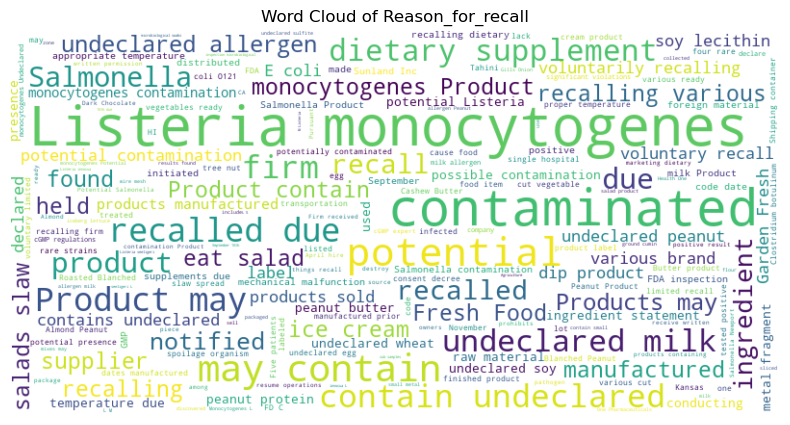

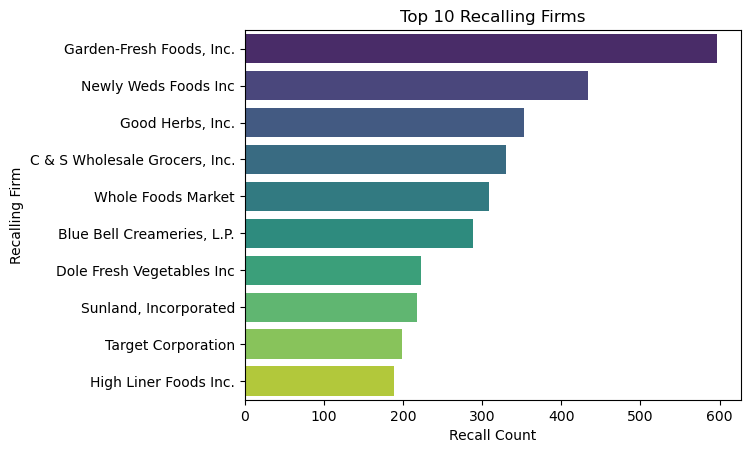

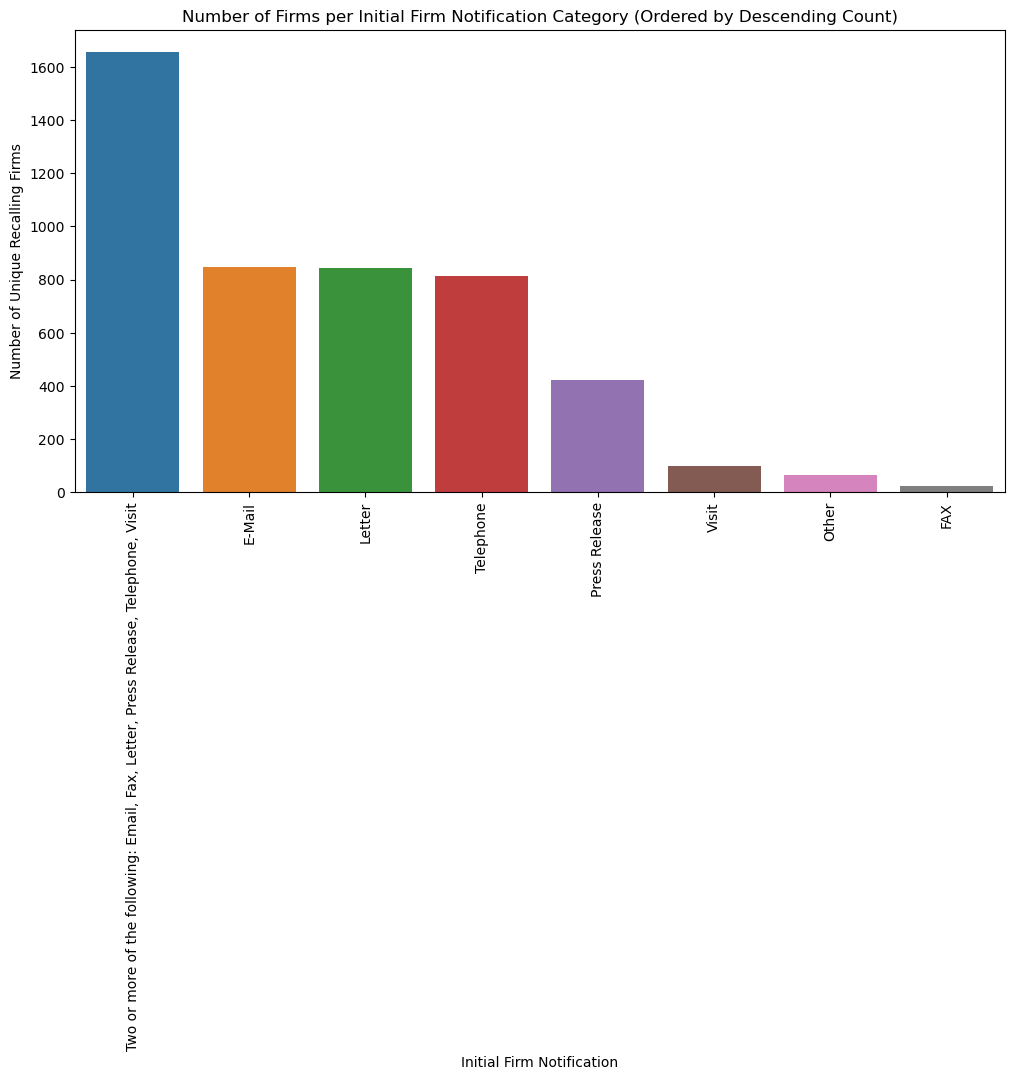

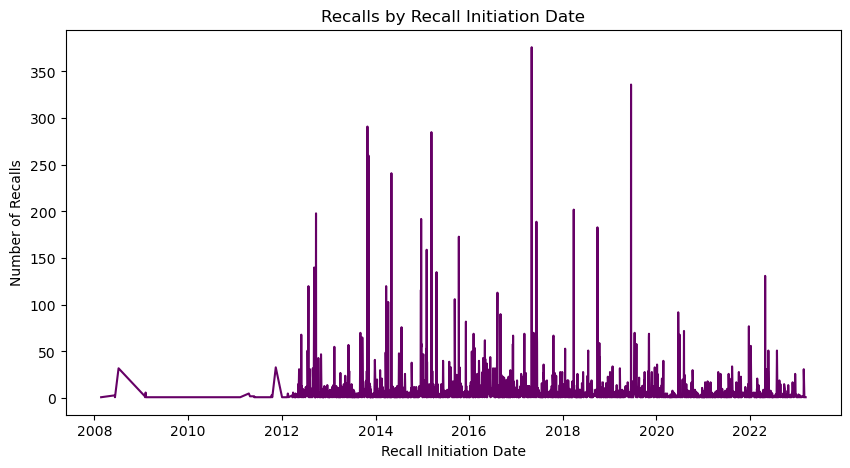

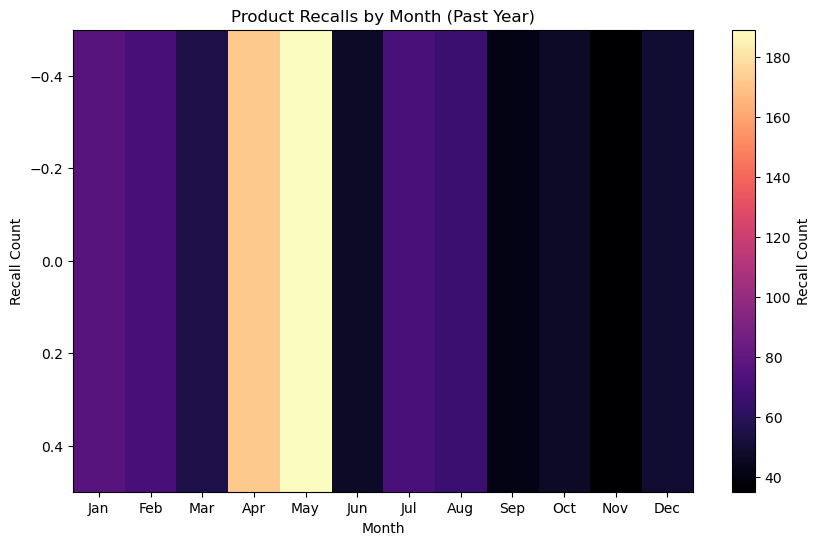

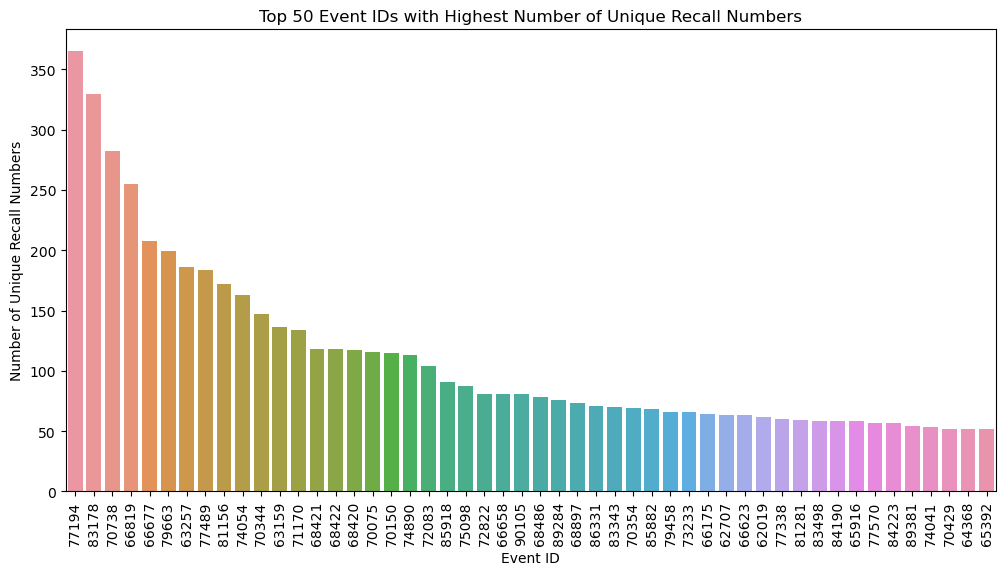

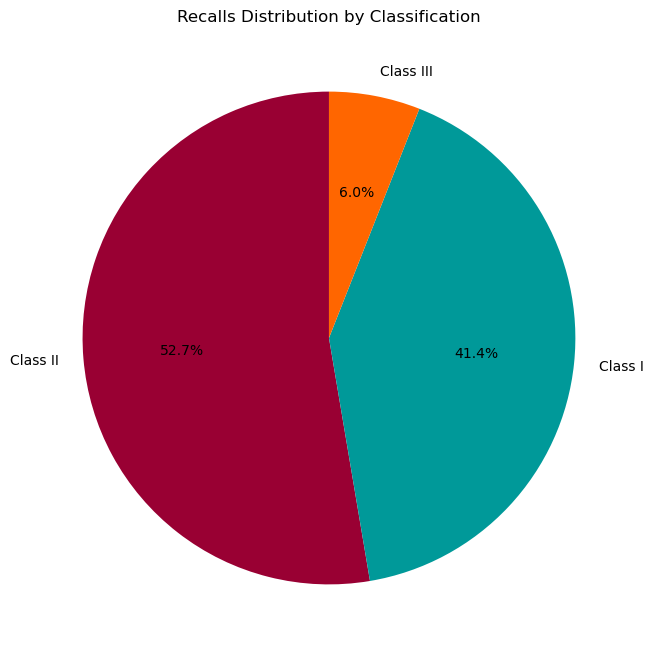

In [2]:
%run ./x22163549_Ashlyn_fda_extraction_preprocessing_visualization_loading.ipynb

Table created successfully!
Data loaded to PostgreSQL successfully!
Data loaded from PostgreSQL to DataFrame successfully!


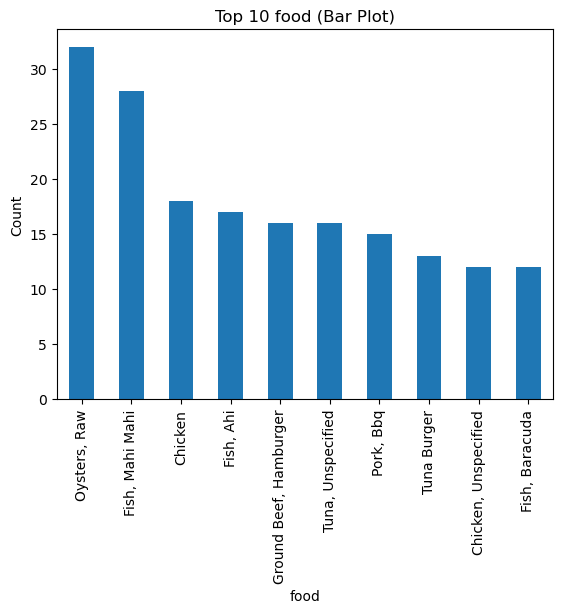

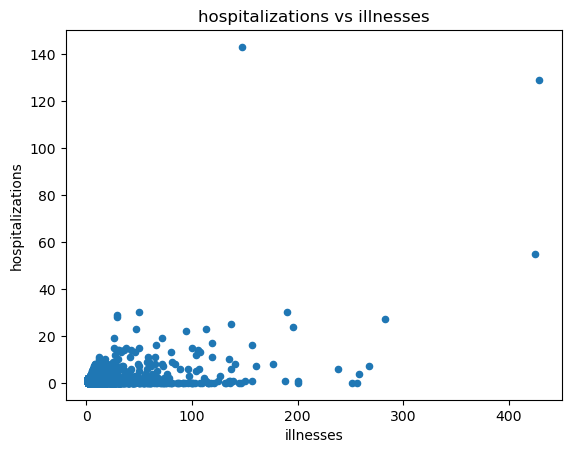

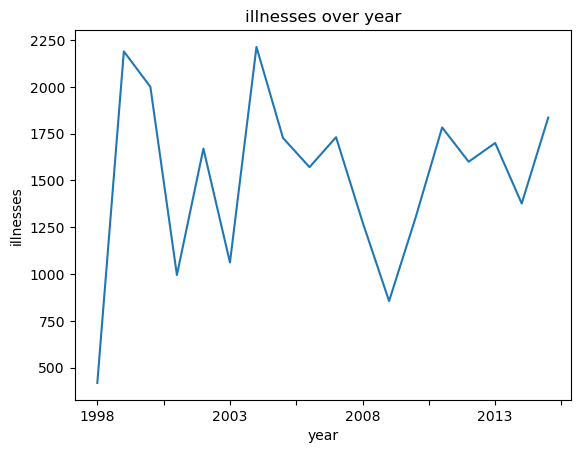

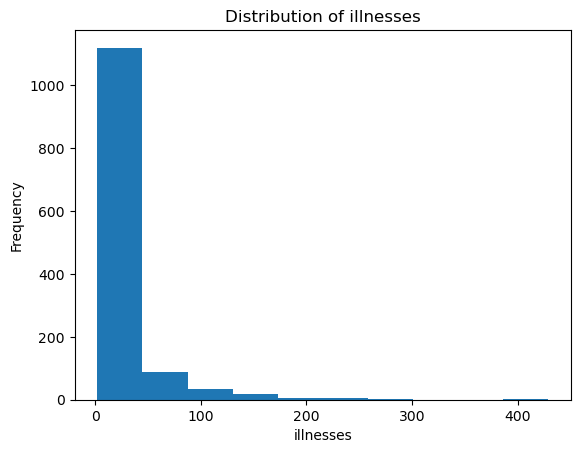

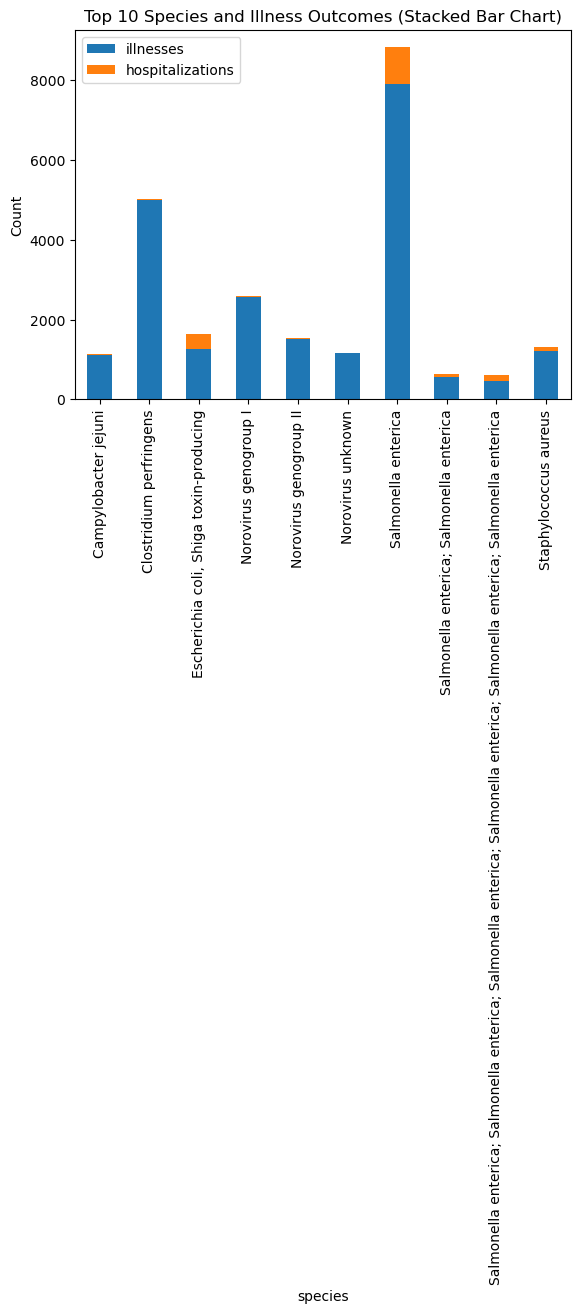

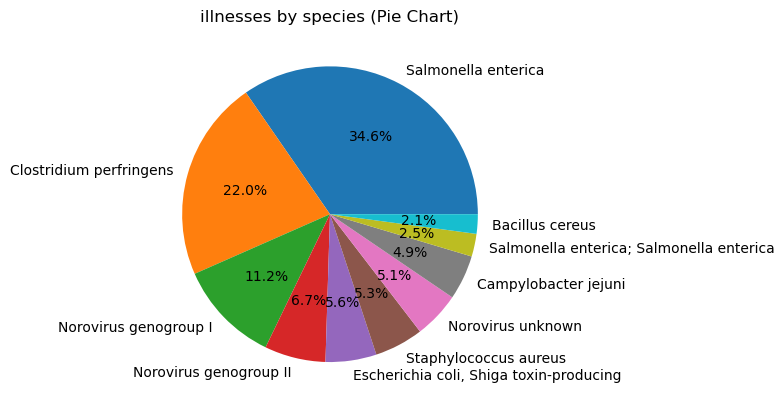

In [3]:
%run ./x22142258_Preetham_Disease_PreProcessing_Visualization_Loading.ipynb

The connection has been established successfully
Collection is empty. Loading data from JSON file...
Loaded 26544 records into MongoDB
Data loaded successfully from JSON file.
Data loaded into a DataFrame.
Number of rows before removing duplicates: 22466
Number of columns before removing duplicates: 10
Number of rows after removing duplicates: 10055
Number of columns after removing duplicates: 10
Number of duplicates in the dataset:  0
Total number of missing values: 0
There are 0 invalid values in the dataset.
                         identification                        name  \
3      00500D38A7B20EF985257D77007137C6            Bowl'd(INACTIVE)   
7      00500D38A7B20EF985257D77007137C6            Bowl'd(INACTIVE)   
11     00500D38A7B20EF985257D77007137C6            Bowl'd(INACTIVE)   
14     00754EF78961359F8525789D0052B055    Super Giant Bakery #0774   
16     00754EF78961359F8525789D0052B055    Super Giant Bakery #0774   
...                                 ...                  

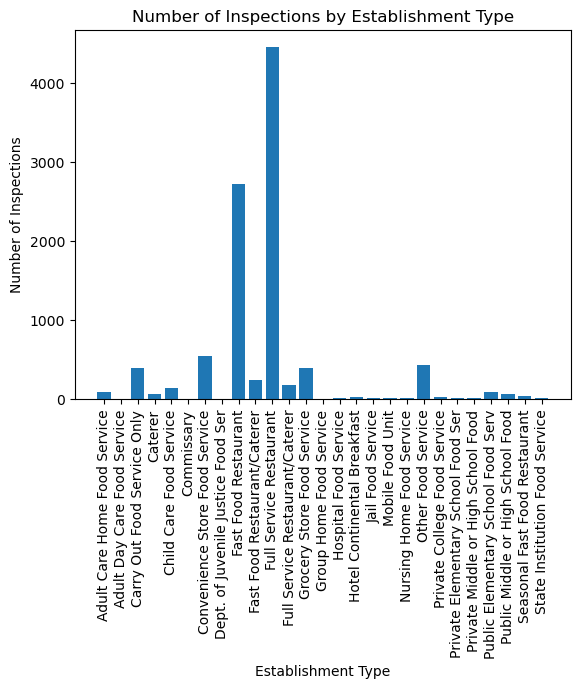

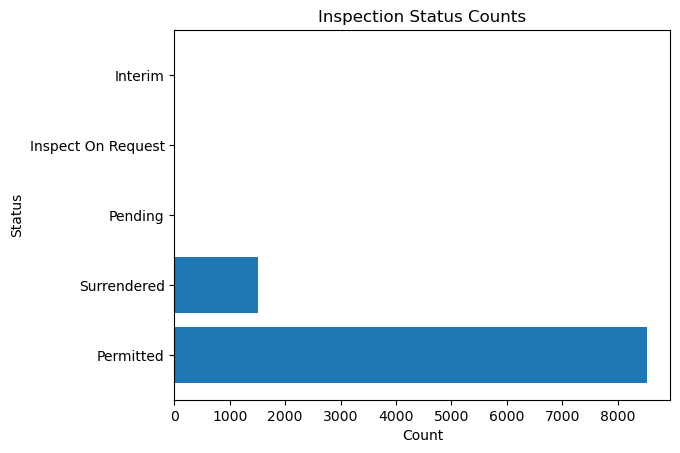

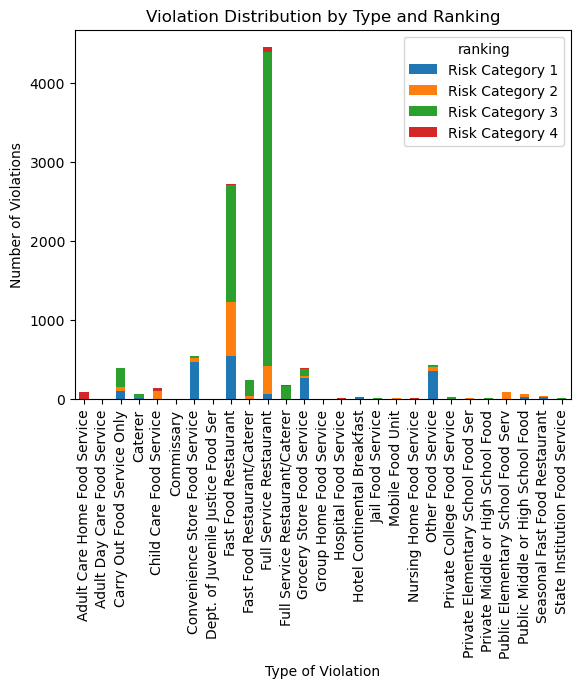

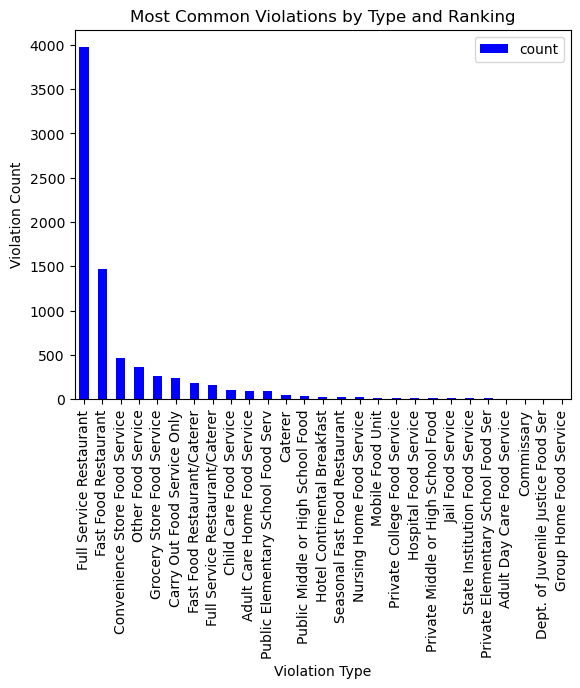

In [4]:
%run ./x22162933_Subash_FoodInspection_extraction_preprocessing_visualization_loading_code.ipynb

Table created successfully!
Data loaded to PostgreSQL successfully!
Data loaded from PostgreSQL to DataFrame successfully!


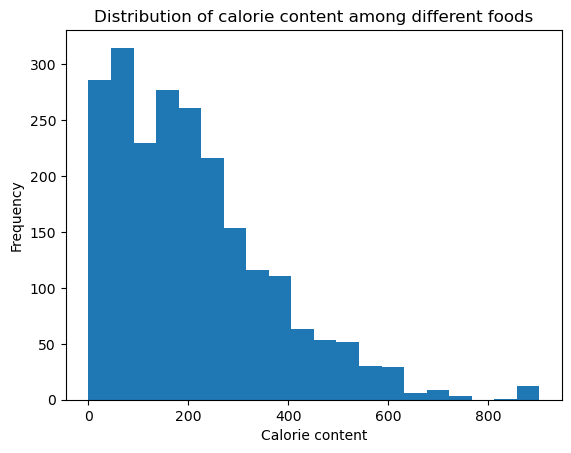

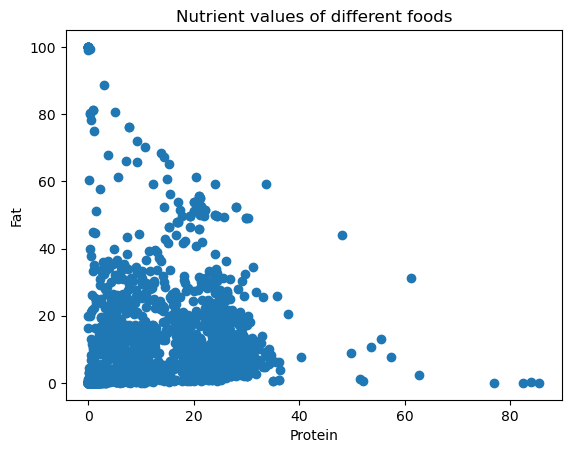

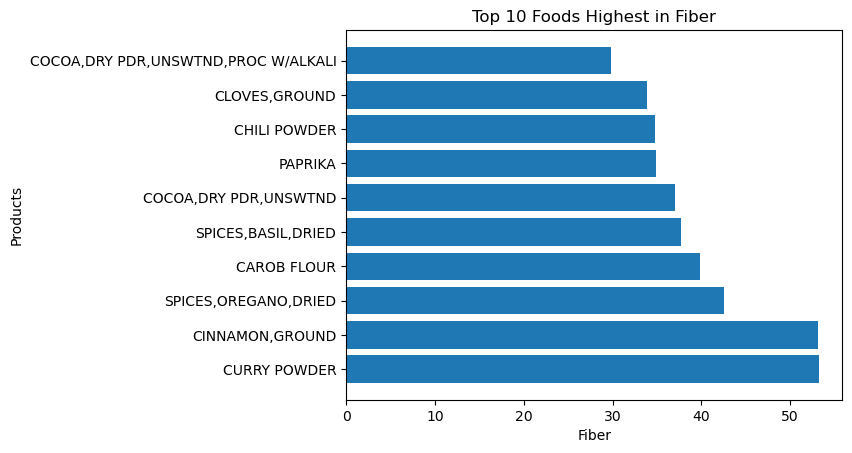

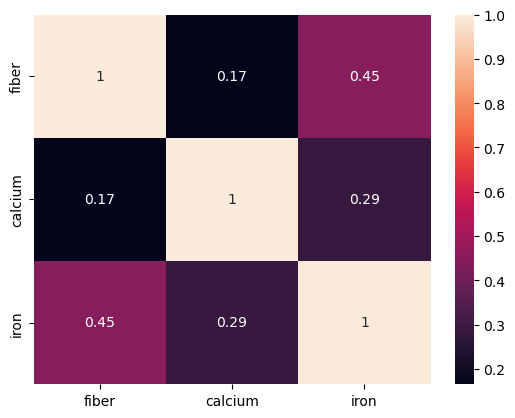

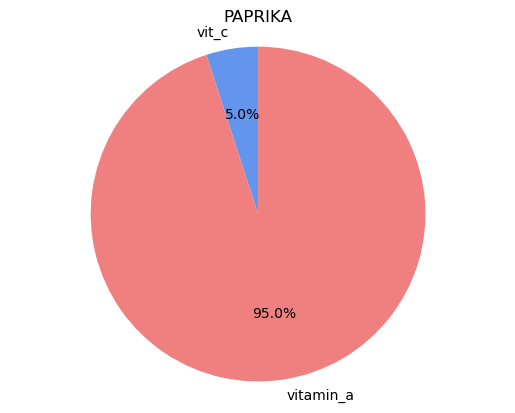

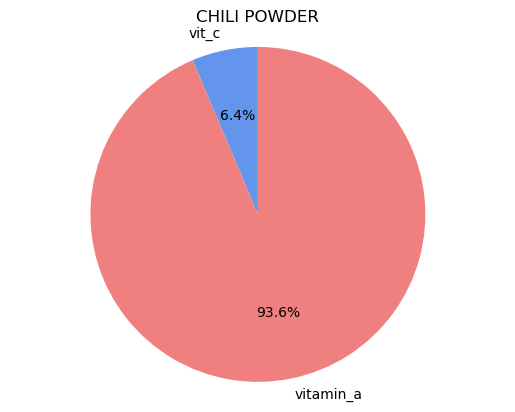

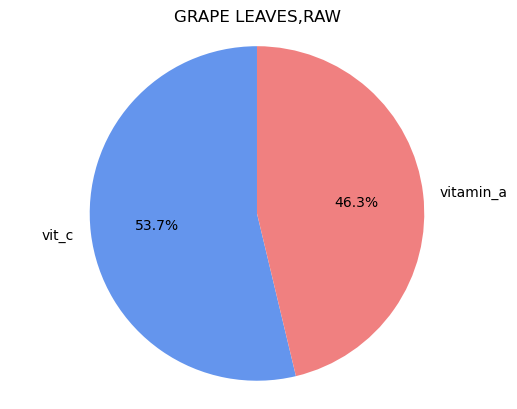

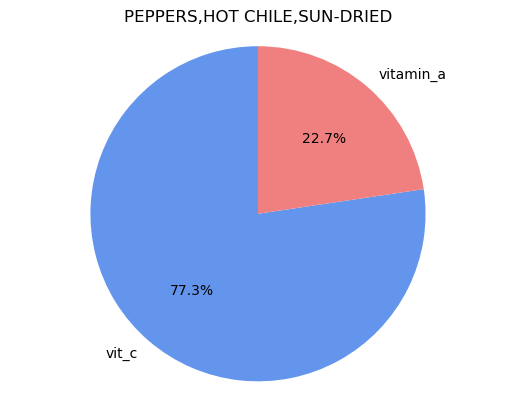

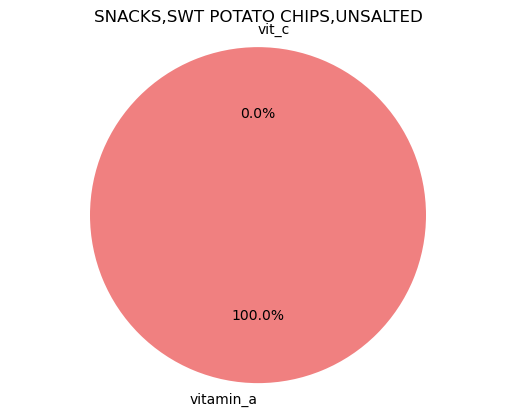

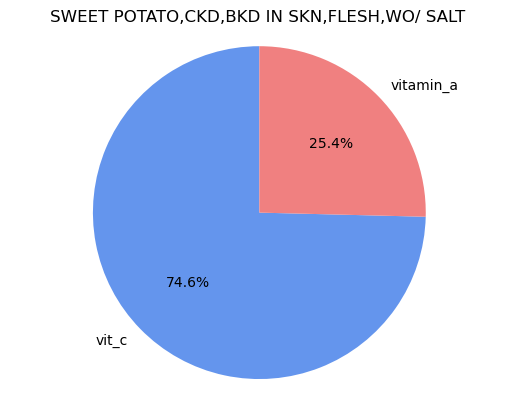

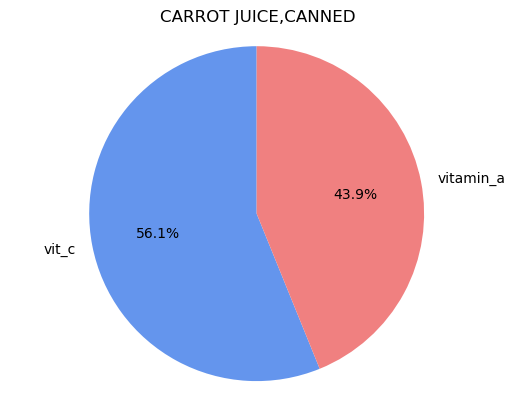

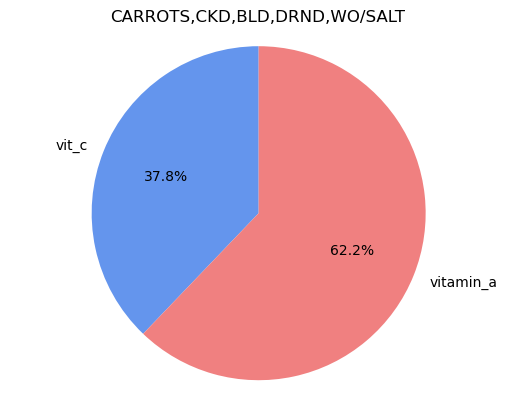

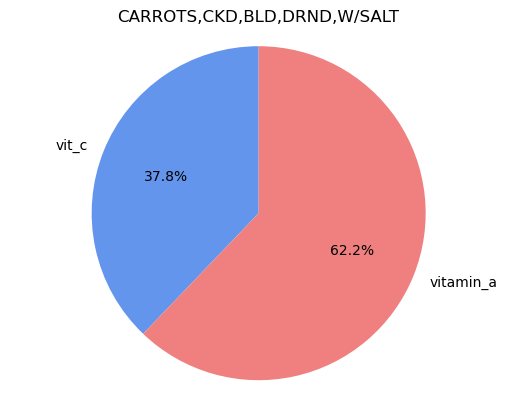

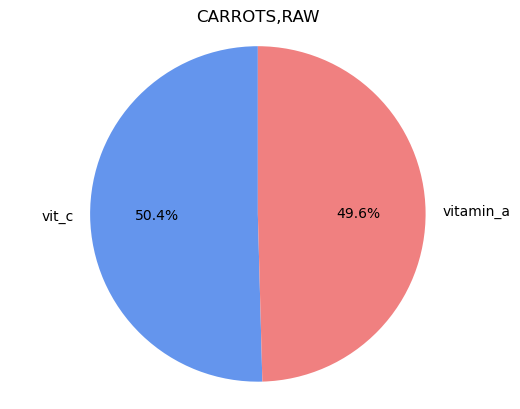

In [5]:
%run ./x22153209_Manoj_nutrients_preprocessing_visualisation_loading.ipynb

In [6]:
conn.close()

### Merging the Disease Outbreak, Food Inspection and Nutrients Datasets 

In [18]:
result = pd.concat([disease_df_cleaned, FoodInspection_df, nutrients_postgres_df], axis=1)

merged_column_names = list(disease_df_cleaned.columns) + list(FoodInspection_df.columns) + list(nutrients_postgres_df.columns) 
result.to_csv('food data merged.csv', index=False, header=merged_column_names)

df_merged = pd.read_csv('food data merged.csv')
food_analysis_merged = df_merged.head(1000)

#### Visualization: How do hospitalization rates vary by states and risk category, and how do these trends compare across different states?

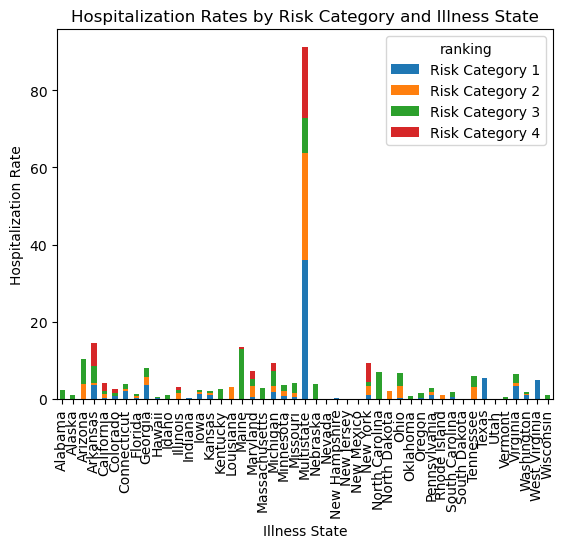

In [19]:
# Group the data by illness state and risk category, and calculate the hospitalization rate
grouped_df = food_analysis_merged.groupby(['state', 'ranking'])['hospitalizations'].mean().unstack()

# Plot the stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set the chart title and labels
plt.title('Hospitalization Rates by Risk Category and Illness State')
plt.xlabel('Illness State')
plt.ylabel('Hospitalization Rate')

# Display the chart
plt.show()

#### Visualization: What is the correlation between various factors related to foodborne illnesses?

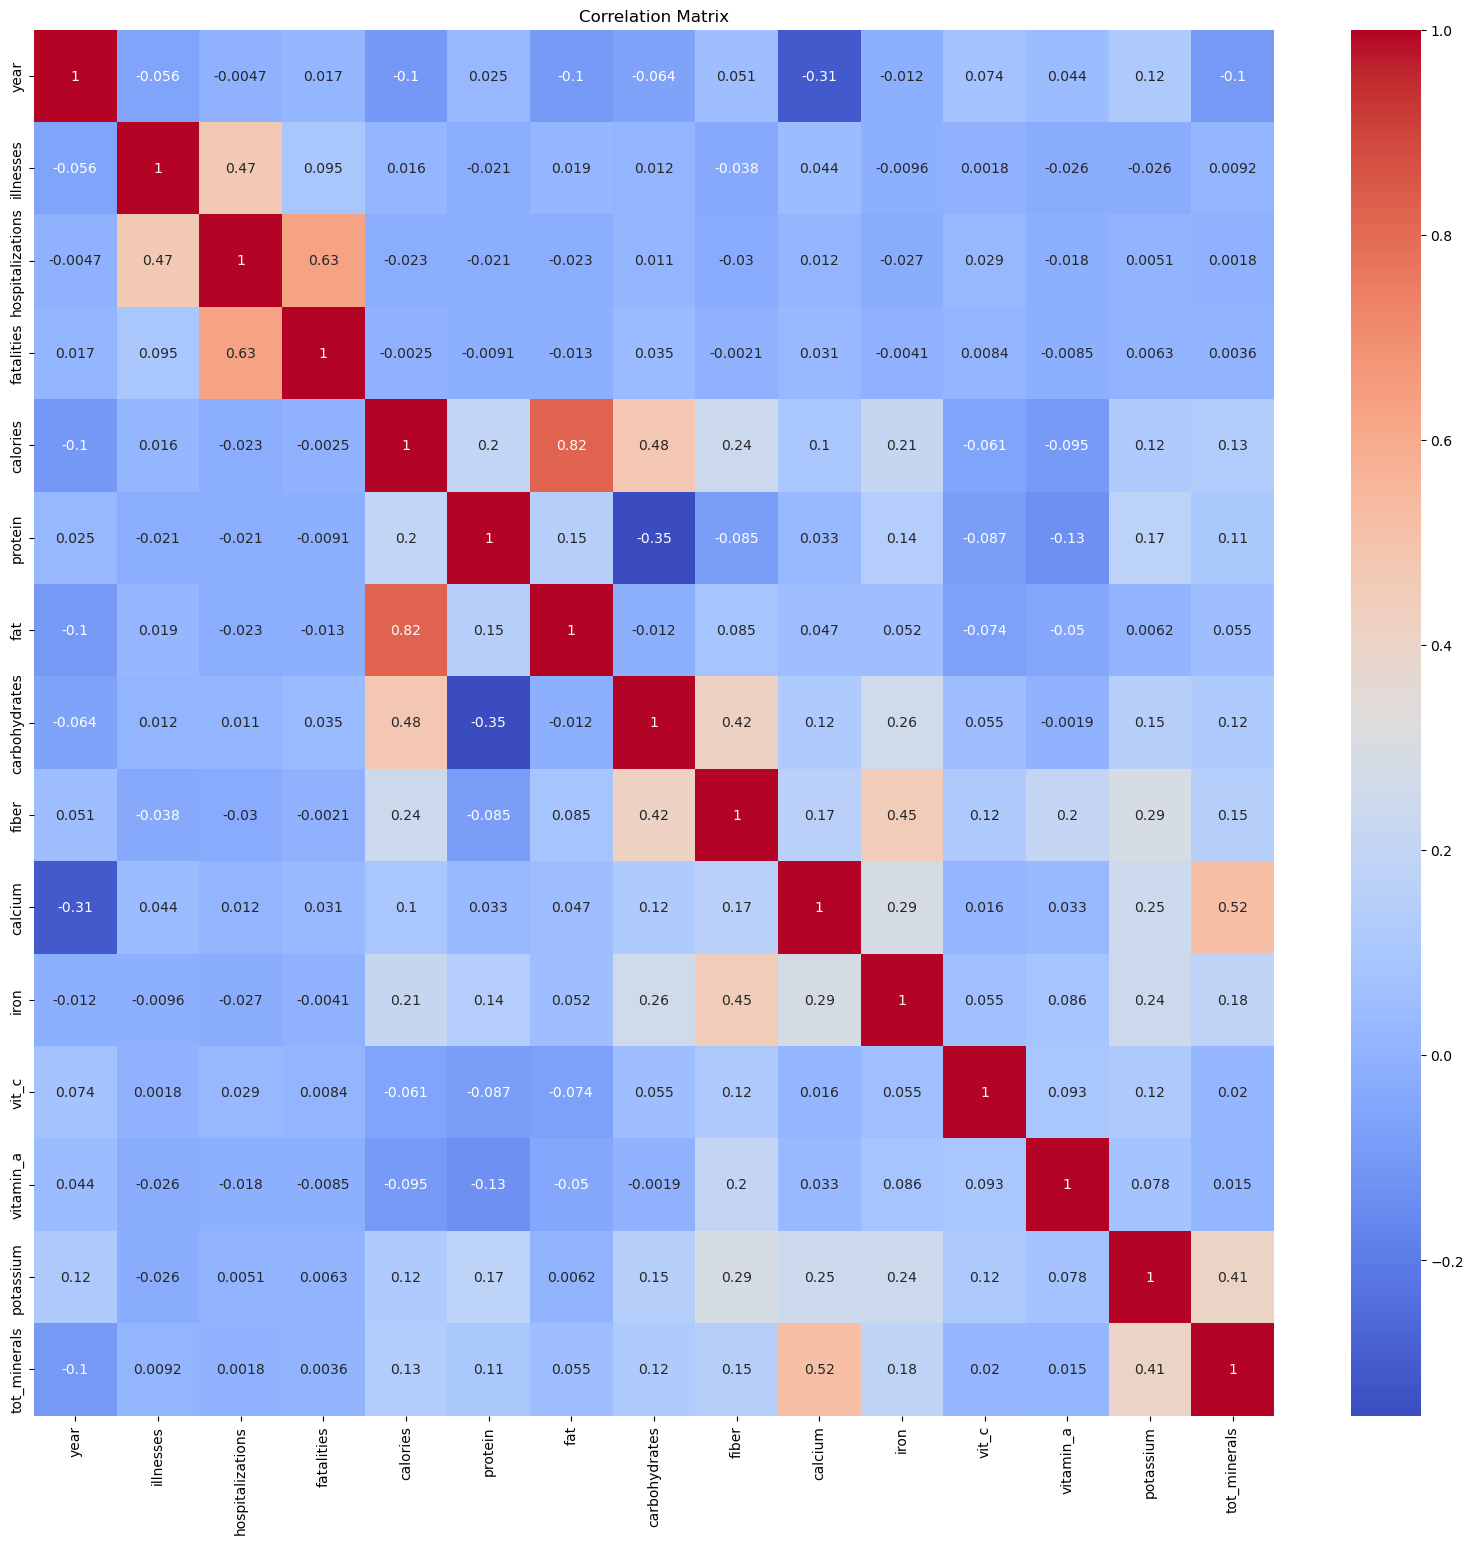

In [23]:
# Read the data into a Pandas DataFrame
df = pd.read_csv('food data merged.csv')

# Compute the correlation matrix
corr = df.corr()

plt.figure(figsize=(20, 18))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()